In [34]:
#pip install unidecode

In [35]:
import pandas as pd
import numpy as np
import re
import string
from unidecode import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
df_productos = pd.read_csv("thegurus-opendata-carrefour-es-products.csv")

C:\Users\javie\AppData\Local\Temp\ipykernel_45244\1253647243.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_productos = pd.read_csv("thegurus-opendata-carrefour-es-products.csv")


In [37]:
df_productos

,id,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,0,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Picada de vacuno ecológico Carrefour Bio 400 g,3.49,NaN,NaN,2020-07-16 04:00:00
1,1,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Hamburguesa de vacuno ecológica sin gluten y s...,1.99,NaN,NaN,2020-07-16 04:00:00
2,2,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Carpaccio de vacuno ecológico Carrefour Bio 12...,2.99,NaN,NaN,2020-07-16 04:00:00
3,3,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Filete 1ªA de añojo ecológico Carrefour Bio 50...,6.95,NaN,NaN,2020-07-16 04:00:00
4,4,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Entrecot de añojo ecológico Carrefour Bio 500 ...,9.45,NaN,NaN,2020-07-16 04:00:00
...,...,...,...,...,...,...,...,...
534014,2438293,carrefour-es,parafarmacia-bio_en_parafarmacia,Tarrito de pollo con arroz desde 6 meses Nutri...,1.21,5.15,kg,2020-10-07 12:00:00
534015,2438294,carrefour-es,parafarmacia-bio_en_parafarmacia,Leche de crecimiento HiPP Combiotik 3 800 g.,21.10,26.38,kg,2020-10-07 12:00:00
534016,2438295,carrefour-es,parafarmacia-bio_en_parafarmacia,Leche de iniciación HiPP Combiotik 1 lata 800 g.,22.95,28.69,kg,2020-10-07 12:00:00
534017,2438296,carrefour-es,parafarmacia-bio_en_parafarmacia,Leche infantil de continuación HiPP Combiotik ...,21.10,26.38,kg,2020-10-07 12:00:00


Como es un dataset con todos los productos que Carrefour ofrece, se encuentran algunos que no son usados para cocinar, por lo que no son de interés para este proyecto.

La columna de categoría es de utilidad para filtrar por los que dentro de estas incluyen mercado, alimentacion, verduras y frutas.

In [38]:
#df_prod = df_prod.drop_duplicates(subset=['name']) #evitar duplicados en los nombres de los productos

In [39]:
df_productos = df_productos.loc[df_productos["category"].str.contains("mercado|alimentacion", case=False)]
df_productos

,id,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,0,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Picada de vacuno ecológico Carrefour Bio 400 g,3.49,NaN,NaN,2020-07-16 04:00:00
1,1,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Hamburguesa de vacuno ecológica sin gluten y s...,1.99,NaN,NaN,2020-07-16 04:00:00
2,2,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Carpaccio de vacuno ecológico Carrefour Bio 12...,2.99,NaN,NaN,2020-07-16 04:00:00
3,3,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Filete 1ªA de añojo ecológico Carrefour Bio 50...,6.95,NaN,NaN,2020-07-16 04:00:00
4,4,carrefour-es,el_mercado-carniceria-bio_en_carniceria,Entrecot de añojo ecológico Carrefour Bio 500 ...,9.45,NaN,NaN,2020-07-16 04:00:00
...,...,...,...,...,...,...,...,...
529767,2433024,carrefour-es,bebe-alimentacion_infantil-bio_en_alimentacion...,Preparado de multifrutas sin azúcar añadido de...,1.99,4.98,kg,2020-10-07 12:00:00
529768,2433025,carrefour-es,bebe-alimentacion_infantil-bio_en_alimentacion...,Preparado de fresa sin azúcar añadido desde 6 ...,1.99,4.98,kg,2020-10-07 12:00:00
529769,2433026,carrefour-es,bebe-alimentacion_infantil-bio_en_alimentacion...,Tarrito de arroz con pollo y verduritas desde ...,2.30,5.75,kg,2020-10-07 12:00:00
529770,2433027,carrefour-es,bebe-alimentacion_infantil-bio_en_alimentacion...,Preparado de manzana y plátano sin azúcar añad...,1.99,4.98,kg,2020-10-07 12:00:00


Obtenemos los nombres de los productos únicos en una lista

In [40]:
list_productos = df_productos["name"].unique()

In [41]:
len(list_productos)

2779

In [42]:
list_productos = list_productos.tolist()

In [43]:
type(list_productos)

list

A partir de la lista generada se procede a limpiar los productos

In [44]:
list_productos2 = list_productos.copy()

In [45]:
#Eliminamos tildes conservando las vocales
list_productos2 = [unidecode(i) for i in list_productos2]

In [46]:
#Se eliminan números y caracteres especiales de los nombres de los productos
list_productos2 = [re.sub(r'[^a-zA-Z ]+', '', i) for i in list_productos2]

In [47]:
#Se eliminan palabras de menos de 3 letras que no son tan relevantes

list_productos2 = [re.sub(r'\b\w{1,2}\b', '', i) for i in list_productos2]

#Se eliminan dobles espacios
list_productos2 = [re.sub('  ', ' ', i) for i in list_productos2]
#Se repite proceso por si hay más dobles espacios
list_productos2 = [re.sub('  ', ' ', i) for i in list_productos2]
list_productos2 = [re.sub('  ', ' ', i) for i in list_productos2]
list_productos2 = [re.sub('  ', ' ', i) for i in list_productos2]

In [48]:
#Se eliminan espacios que pueden quedar al comienzo y al final de cada string
list_productos2 = [i.strip() for i in list_productos2]

In [49]:
list_productos2

['Picada vacuno ecologico Carrefour Bio',
 'Hamburguesa vacuno ecologica sin gluten sin lactosa Carrefour Bio',
 'Carpaccio vacuno ecologico Carrefour Bio aprox',
 'Filete anojo ecologico Carrefour Bio aprox',
 'Entrecot anojo ecologico Carrefour Bio aprox',
 'Estofado anojo ecologico Carrefour Bio aprox',
 'Solomillo anojo ecologico Carrefour Bio aprox',
 'Escalope pollo ecologico Carrefour Bio',
 'Hamburguesa pollo ecologica Carrefour Bio',
 'Pechuga pollo ecologica Carrefour Bio',
 'Pechuga pollo fileteada ecologica Carrefour Bio',
 'Pollo limpio entero ecologico Carrefour Bio aprox',
 'Preparado carne picada pollo ecologica Carrefour Bio',
 'Jamoncito pollo ecologico Carrefour Bio',
 'Muslo pollo ecologico Carrefour Bio',
 'Ala pollo spunta ecologica Carrefour Bio',
 'Pechuga pollo fileteada Roler',
 'Jamoncitos pollo Carrefour aprox',
 'Pechuga pollo certificado fileteado Carrefour aprox',
 'Pechuga pollo fileteada Carrefour aprox',
 'Pechuga pavo fileteada Carrefour aprox',
 'Ala

In [50]:
#Minúscula para normalizar
list_productos2 = [i.lower() for i in list_productos2]

In [51]:
list_productos3 = list_productos2.copy()

In [52]:
#Hay palabras que se repiten bastante y que poco aportan para identificar un producto y para prepararlo, por lo que se procede a eliminarlas
#list_productos2 = 
list_productos3 = [i.replace('aprox', '') for i in list_productos3]
list_productos3 = [i.replace('carrefour', '') for i in list_productos3]
list_productos3 = [i.replace('ecologico', '') for i in list_productos3]
list_productos3 = [i.replace('ecologica', '') for i in list_productos3]
list_productos3 = [i.replace('bio', '') for i in list_productos3]


In [53]:
#Se eliminan dobles espacios
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
#Se repite proceso por si hay más dobles espacios
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
#Se eliminan espacios que pueden quedar al comienzo y al final de cada string
list_productos3 = [i.strip() for i in list_productos3]

In [54]:
list_productos3

['picada vacuno',
 'hamburguesa vacuno sin gluten sin lactosa',
 'carpaccio vacuno',
 'filete anojo',
 'entrecot anojo',
 'estofado anojo',
 'solomillo anojo',
 'escalope pollo',
 'hamburguesa pollo',
 'pechuga pollo',
 'pechuga pollo fileteada',
 'pollo limpio entero',
 'preparado carne picada pollo',
 'jamoncito pollo',
 'muslo pollo',
 'ala pollo spunta',
 'pechuga pollo fileteada roler',
 'jamoncitos pollo',
 'pechuga pollo certificado fileteado',
 'pechuga pollo fileteada',
 'pechuga pavo fileteada',
 'alas pollo certificado',
 'pechuga pollo certificado entera',
 'solomillo pavo duplo',
 'chuleta pavo marinada ajillo kovo',
 'contramuslo pollo',
 'longaniza fresca pollo',
 'pechuga pollo campero fileteada calidad origen',
 'carne pavo para estofado',
 'chuleta pavo',
 'pechuga pavo marinada pimenton aldelis',
 'pollo campero limpio calidad origen',
 'pechuga pollo campero entera calidad origen',
 'pechuga pollo',
 'pollo entero limpio',
 'jamoncitos pollo',
 'traseros pollo',
 'c

Ahora visualizamos el contenido de los productos limpios

In [55]:
#Primero se unifica todo en un string
palabras_productos3 = " ".join(i for i in list_productos3)

In [ ]:
palabras_productos3

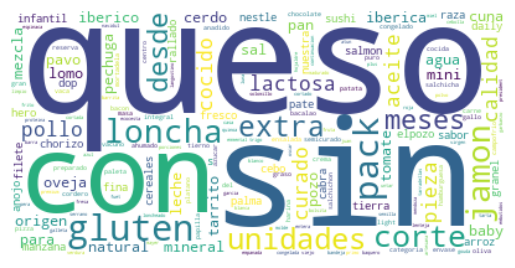

In [57]:
# Generamos una nube de palabras para ver la frecuencia en que se repiten los productos
wordcloud = WordCloud(background_color="white", collocations=False).generate(palabras_productos3)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Obtenemos un dataframe con las variaciones de los nombres de los productos que se pueden usar para las recetas

In [59]:
list_productos3[1]

'hamburguesa vacuno sin gluten sin lactosa'

In [61]:
#def substring_before(s, delim):
#    return s.partition(delim)[0]


In [63]:
list_productos3_1_ = substring_after(list_productos3[1],'sin')

In [64]:
list_productos3_1_ 

'hamburguesa vacuno '

In [71]:
list_productos3 = [producto.partition('sin')[0] for producto in list_productos3] #Quitamos lo que vaya desde la palabra sin
#Hacemos lo mismo con otras preposiciones que sobresalen en la nube de palabras
list_productos3 = [producto.partition('con')[0] for producto in list_productos3]
list_productos3 = [producto.partition('para')[0] for producto in list_productos3]
list_productos3 = [producto.partition('desde')[0] for producto in list_productos3]

In [73]:
#De nuevo...

#Se eliminan dobles espacios
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
#Se repite proceso por si hay más dobles espacios
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
list_productos3 = [re.sub('  ', ' ', i) for i in list_productos3]
#Se eliminan espacios que pueden quedar al comienzo y al final de cada string
list_productos3 = [i.strip() for i in list_productos3]

#Por si quedan palabras sueltas sin sentido después de los últimos procedimientos
list_productos3 = [re.sub(r'\b\w{1,2}\b', '', i) for i in list_productos3]

In [74]:
list_productos3

['picada vacuno',
 'hamburguesa vacuno',
 'carpaccio vacuno',
 'filete anojo',
 'entrecot anojo',
 'estofado anojo',
 'solomillo anojo',
 'escalope pollo',
 'hamburguesa pollo',
 'pechuga pollo',
 'pechuga pollo fileteada',
 'pollo limpio entero',
 'pre',
 'jamoncito pollo',
 'muslo pollo',
 'ala pollo spunta',
 'pechuga pollo fileteada roler',
 'jamoncitos pollo',
 'pechuga pollo certificado fileteado',
 'pechuga pollo fileteada',
 'pechuga pavo fileteada',
 'alas pollo certificado',
 'pechuga pollo certificado entera',
 'solomillo pavo duplo',
 'chuleta pavo marinada ajillo kovo',
 '',
 'longaniza fresca pollo',
 'pechuga pollo campero fileteada calidad origen',
 'carne pavo',
 'chuleta pavo',
 'pechuga pavo marinada pimenton aldelis',
 'pollo campero limpio calidad origen',
 'pechuga pollo campero entera calidad origen',
 'pechuga pollo',
 'pollo entero limpio',
 'jamoncitos pollo',
 'traseros pollo',
 '',
 'traseros pollo certificado',
 '',
 'hamburguesas anojo calidad origen',
 'p

In [75]:
df_nombres_productos = pd.DataFrame(list(zip(list_productos, list_productos2, list_productos3)), columns= ['productos_raw', 'productos_v2', 'productos_v3'])

In [76]:
df_nombres_productos

,productos_raw,productos_v2,productos_v3
0,Picada de vacuno ecológico Carrefour Bio 400 g,picada vacuno ecologico carrefour bio,picada vacuno
1,Hamburguesa de vacuno ecológica sin gluten y s...,hamburguesa vacuno ecologica sin gluten sin la...,hamburguesa vacuno
2,Carpaccio de vacuno ecológico Carrefour Bio 12...,carpaccio vacuno ecologico carrefour bio aprox,carpaccio vacuno
3,Filete 1ªA de añojo ecológico Carrefour Bio 50...,filete anojo ecologico carrefour bio aprox,filete anojo
4,Entrecot de añojo ecológico Carrefour Bio 500 ...,entrecot anojo ecologico carrefour bio aprox,entrecot anojo
...,...,...,...
2774,Endivia Carrefour 450 g,endivia carrefour,endivia
2775,Pimiento en tiras Carrefour 450 g.,pimiento tiras carrefour,pimiento tiras
2776,Lomos salmón congelados Carrefour 480 g.,lomos salmon congelados carrefour,lomos salmon
2777,Snacks de Lentejas y Maíz Ecológicos Hero Baby...,snacks lentejas maiz ecologicos hero baby solo,snacks lentejas maiz hero baby solo


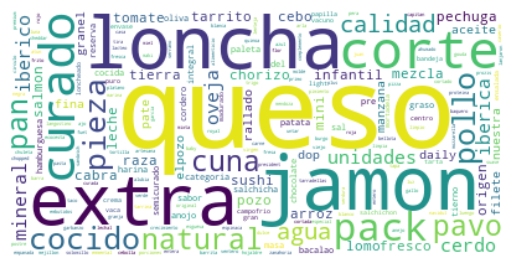

In [77]:
#Volvemos a visualizar la nube de palabras
palabras_productos3 = " ".join(i for i in list_productos3)

wordcloud = WordCloud(background_color="white", collocations=False).generate(palabras_productos3)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Quedó bastante más limpio. Hay otras palabras que resaltan que efectivamente no hacen referencia a productos pero pueden ser útiles para el reconocimiento en otras etapas del proyecto, por lo que se opta por dejarlas

In [78]:
#df_nombres_productos.to_csv('nombres_productos_limpiados.csv')